 Fonctionnement:
- 1. Initialisation : W,b.
- 2. Calcul : Le neurone combine les entrées avec des poids W et une valeur b (biais) pour produire une somme Z.
- 3. Activation : On applique une fonction  sigmoïde pour transformer Z en une sortie entre 0 et 1.
- 4. Évaluation : On mesure l’erreur entre la sortie du neurone et la vraie valeur attendue (y),Log Loss.
- 5. Apprentissage : On ajuste les poids et le biais pour que le neurone fasse moins d’erreurs à l’avenir. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

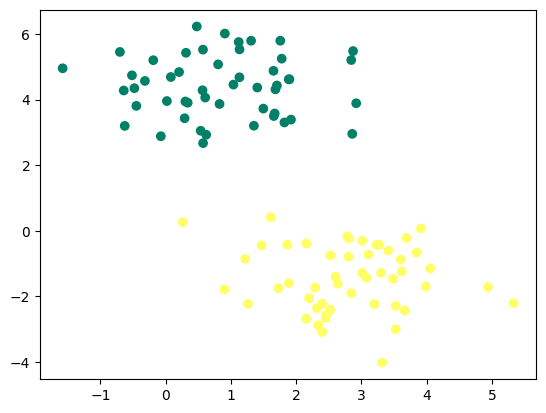

In [178]:
X,y=make_blobs(n_samples=100,n_features=5,centers=2,random_state=0)
y=y.reshape(-1,1)
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()

In [ ]:
X.shape

(100, 5)

<h1>Fontion d'initialisation

In [180]:
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return W,b
W,b=initialisation(X)
initialisation(X)

(array([[-0.85444591],
        [-0.20683058],
        [-1.78663461],
        [-0.2774058 ],
        [ 1.49773328]]),
 array([-0.95319528]))

<h1>Model

In [181]:
def model(X,W,b):
     Z=X.dot(W)+b
     A=1/(1+np.exp(-Z))
     return A
A=model(X,W,b)
model(X,W,b)

array([[4.23761873e-02],
       [9.99484169e-01],
       [9.88483115e-01],
       [9.98537213e-01],
       [9.98287532e-01],
       [9.92908941e-01],
       [9.93326803e-01],
       [2.35943059e-02],
       [9.33332511e-01],
       [1.40983344e-01],
       [9.99529530e-01],
       [6.93548890e-01],
       [6.31804509e-02],
       [9.99937709e-01],
       [7.66006631e-01],
       [9.96804855e-01],
       [2.02979590e-01],
       [4.26824469e-02],
       [9.99764293e-01],
       [9.80244037e-01],
       [9.98053532e-01],
       [9.80091273e-01],
       [9.99837619e-01],
       [9.99904493e-01],
       [8.91076711e-01],
       [1.21172921e-01],
       [5.05859655e-02],
       [1.28807354e-02],
       [9.75279743e-01],
       [4.25454593e-01],
       [9.93453945e-01],
       [9.01972351e-01],
       [5.03527753e-02],
       [2.35605698e-02],
       [9.99805603e-01],
       [6.17299242e-01],
       [3.79222751e-01],
       [9.80515073e-01],
       [9.71185782e-01],
       [5.53047874e-01],


<h1>Log Loss fonction Erreur

In [182]:
def log_loss(A,y):
    return 1/len(y) * np.sum(-y*np.log(A)-(1-y)*np.log(1-A))
loss=log_loss(A,y)
log_loss(A,y)

3.250759636607506

Gradient

In [183]:
def gradient(A,X,y):
    dw=1/len(y) * np.dot(X.T,A-y)
    db=1/len(y) * np.sum(A-y)
    return dw,db
dw,db= gradient(A,X,y)
gradient(A,X,y)

(array([[-0.34761131],
        [ 2.39236151],
        [-1.19801187],
        [-2.42819397],
        [-0.15963502]]),
 0.16543003882310875)

<h1>Update

In [184]:
def update(dw,db,w,b,learnin_rate):
    w=w-learnin_rate*dw
    b=b-learnin_rate*db
    return w,b

<h1>Prediction

In [185]:
def predict(X,W,b):
    A=model(X,W,b)
    return A>=0.5

In [186]:
from sklearn.metrics import accuracy_score

<h1>Algorithem de neuron

ACC 1.0


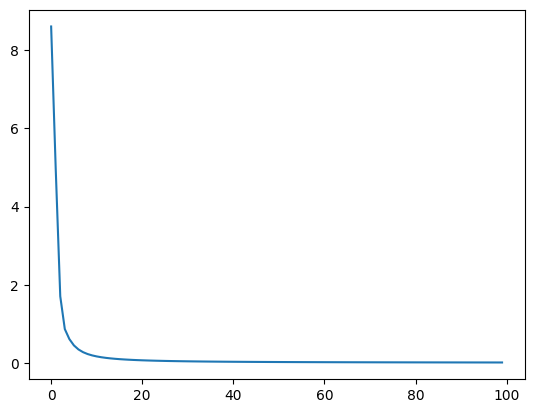

In [187]:
def artificial_neuron(X,y,learning_rate=0.1,n_iter=100):
    #intialisation W er b
    W,b=initialisation(X)
    Loss=[]
    for i in range(n_iter):
        A=model(X,W,b)
        loss=log_loss(A,y)
        Loss.append(loss)
        dw,db=gradient(A,X,y)
        W,b=update(dw,db,W,b,learning_rate)
    
  
    acc=accuracy_score(predict(X,W,b),y)
    print('ACC',acc)
    fig,axs=plt.subplots()
    axs.plot(Loss)
    plt.show()
    return W,b
W,b=artificial_neuron(X,y)


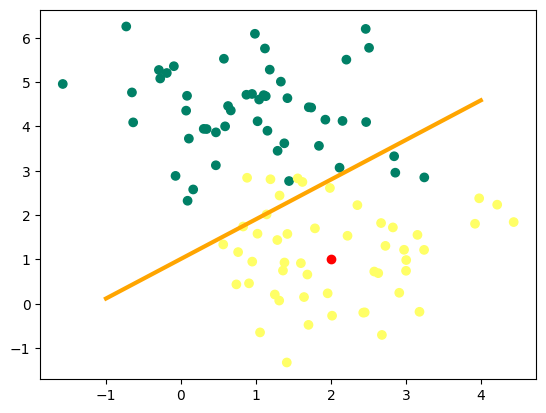

[ True]


In [177]:
new_x=np.array([2,1])
x0=np.linspace(-1,4,1000)
x1=(-W[0]*x0-b)/W[1]
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(new_x[0],new_x[1],c='r')
plt.plot(x0,x1,c="orange" ,lw=3)
plt.show()
print(predict(new_x,W,b))